In [114]:
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
df = pd.read_csv('../data/titanic.csv')
df

True

In [64]:
target = df['Survived']
new_df = df.drop(['Survived','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
new_df['Age'].fillna(new_df['Age'].mean(),inplace=True)
new_df

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [77]:
new_df = new_df.reset_index()

In [6]:
from sklearn.preprocessing import LabelEncoder

In [19]:
sex_n = LabelEncoder()

In [89]:
new_df['Sex'] = sex_n.fit_transform(new_df['Sex'])

new_df

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [68]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [35]:
model = tree.DecisionTreeClassifier()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(new_df,target,test_size=0.2)

len(X_train)

In [108]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [110]:
model.score(X_test,y_test)

0.7988826815642458

In [98]:
# male - 1 female - 0
model.predict([[1,0,38,71.2833]])

/home/rajyavardhan/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

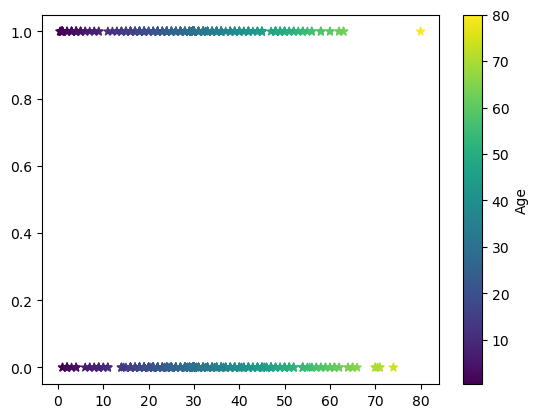

In [125]:
%matplotlib inline
plt.scatter(new_df['Age'], target, c=new_df['Age'], cmap='viridis', marker='*')  # Change 'viridis' to any colormap you prefer
plt.colorbar(label='Age')